In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [49]:
test = pd.read_csv('make_org_datasets/test.csv')
training_and_validation = pd.read_csv('make_org_datasets/training_and_validation.csv')

/var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/ipykernel_8890/4226947172.py:2: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  training_and_validation = pd.read_csv('make_org_datasets/training_and_validation.csv')


In [50]:
month_mapping = {
    '01': 1,
    '02': 2,
    '03': 3,
    '04': 4,
    '05': 5,
    '06': 6,
    '07': 7,
    '08': 8,
    '09': 9,
    '10': 10,
    '11': 11,
    '12': 12
}

hour_mapping = {
    '01': 1,
    '02': 2,
    '03': 3,
    '04': 4,
    '05': 5,
    '06': 6,
    '07': 7,
    '08': 8,
    '09': 9,
    '10': 10,
    '11': 11,
    '12': 12,
    '13': 13,
    '14': 14,
    '15': 15,
    '16': 16,
    '17': 17,
    '18': 18,
    '19': 19,
    '20': 20,
    '21': 21,
    '22': 22,
    '23': 23,
    '00': 24
}

training_and_validation['date_forecast'] = training_and_validation['date_forecast'].astype(str)
# Extract the month name from the 'date_forecast' column and map it to numeric values
training_and_validation['Month'] = training_and_validation['date_forecast'].str.split('-').str[1].map(month_mapping).astype(int)
training_and_validation['Year'] = training_and_validation['date_forecast'].str.split('-').str[0].astype(int)
training_and_validation['Day'] = training_and_validation['date_forecast'].str[8:10].astype(int)
training_and_validation['Hour'] = training_and_validation['date_forecast'].str[-8:-6].map(hour_mapping).astype(int)

test['date_forecast'] = test['date_forecast'].astype(str)
# Extract the month name from the 'date_forecast' column and map it to numeric values
test['Month'] = test['date_forecast'].str.split('-').str[1].map(month_mapping).astype(int)
test['Year'] = test['date_forecast'].str.split('-').str[0].astype(int)
test['Day'] = test['date_forecast'].str[8:10].astype(int)
test['Hour'] = test['date_forecast'].str[-8:-6].map(hour_mapping).astype(int)

In [51]:
selected_features = [
    "date_forecast",
    "Location_A",
    "Location_B",
    "Location_C",
    "Month",
    "Day",
    "Hour",
    "direct_rad:W",
    "direct_rad_1h:J",
    "clear_sky_rad:W",
    "clear_sky_energy_1h:J",
    "diffuse_rad:W",
    "diffuse_rad_1h:J",
    "sun_elevation:d",
    "is_in_shadow:idx",
    "pv_measurement"
]

training_and_validation = training_and_validation[selected_features]

In [52]:
selected_features = [
    "date_forecast",
    "Location_A",
    "Location_B",
    "Location_C",
    "Month",
    "Day",
    "Hour",
    "direct_rad:W",
    "direct_rad_1h:J",
    "clear_sky_rad:W",
    "clear_sky_energy_1h:J",
    "diffuse_rad:W",
    "diffuse_rad_1h:J",
    "sun_elevation:d",
    "is_in_shadow:idx"
]

test = test[selected_features]

In [53]:
test

,date_forecast,Location_A,Location_B,Location_C,Month,Day,Hour,direct_rad:W,direct_rad_1h:J,clear_sky_rad:W,clear_sky_energy_1h:J,diffuse_rad:W,diffuse_rad_1h:J,sun_elevation:d,is_in_shadow:idx
0,2023-05-01 00:00:00,1,0,0,5,1,24,0.000000,0.000,0.000,0.000,0.000,0.000,-10.541000,1.0
1,2023-05-01 01:00:00,1,0,0,5,1,1,0.000000,0.000,0.000,0.000,0.000,0.000,-7.894500,1.0
2,2023-05-01 02:00:00,1,0,0,5,1,2,0.000000,0.000,0.000,0.000,0.000,0.000,-3.815500,1.0
3,2023-05-01 03:00:00,1,0,0,5,1,3,2.100000,3765.350,11.675,10124.425,9.375,16845.227,1.412500,0.5
4,2023-05-01 04:00:00,1,0,0,5,1,4,25.450000,49571.200,76.875,141748.600,47.400,102209.700,7.468500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2023-07-03 19:00:00,0,0,1,7,3,19,13.450001,53064.920,84.775,475981.380,32.200,162567.530,8.131001,0.0
2156,2023-07-03 20:00:00,0,0,1,7,3,20,2.400000,28523.800,24.550,183261.340,13.875,82875.350,3.239500,0.5
2157,2023-07-03 21:00:00,0,0,1,7,3,21,0.000000,4322.475,1.225,36831.074,1.250,27210.250,-0.477000,1.0
2158,2023-07-03 22:00:00,0,0,1,7,3,22,0.000000,0.000,0.000,344.575,0.000,2242.150,-2.787750,1.0


In [54]:
# Create one-hot encoding variables for months (1-12)
months_dummies = pd.get_dummies(training_and_validation['Month'], prefix='Month')
training_and_validation = pd.concat([training_and_validation, months_dummies], axis=1)

months_dummies_test = pd.get_dummies(test['Month'], prefix='Month')
test = pd.concat([test, months_dummies_test], axis=1)

# Create one-hot encoding variables for days (1-31)
days_dummies = pd.get_dummies(training_and_validation['Day'], prefix='Day')
training_and_validation = pd.concat([training_and_validation, days_dummies], axis=1)

days_dummies_test = pd.get_dummies(test['Day'], prefix='Day')
test = pd.concat([test, days_dummies_test], axis=1)

# Create one-hot encoding variables for hours (1-12)
hours_dummies = pd.get_dummies(training_and_validation['Hour'], prefix='Hour')
training_and_validation = pd.concat([training_and_validation, hours_dummies], axis=1)

hours_dummies_test = pd.get_dummies(test['Hour'], prefix='Hour')
test = pd.concat([test, hours_dummies_test], axis=1)

In [55]:
columns_to_convert = [col for col in training_and_validation.columns if col != "date_forecast"]
columns_to_convert2 = [col for col in test.columns if col != "date_forecast"]

# Convert the selected columns to integer (1/0)
training_and_validation[columns_to_convert] = training_and_validation[columns_to_convert].astype(int)
test[columns_to_convert2] = test[columns_to_convert2].astype(int)

In [56]:
months_to_add = [1, 2, 3, 4, 8, 9, 10, 11, 12]  # All days from 1 to 31
days_to_add = [5, 7, 8, 10, 12, 15, 16, 17, 24, 31]

# Create a DataFrame with all zeros
zero_df = pd.DataFrame(0, columns=[f'Month_{month}' for month in months_to_add], index=test.index)
zero_df2 = pd.DataFrame(0, columns=[f'Day_{day}' for day in days_to_add], index=test.index)

# Concatenate the zero_df with the 'test' DataFrame
test = pd.concat([test, zero_df], axis=1)
test = pd.concat([test, zero_df2], axis=1)

test = test.drop(['Day', 'Month', 'Hour'], axis=1)
training_and_validation = training_and_validation.drop(['Day', 'Month', 'Hour'], axis=1)

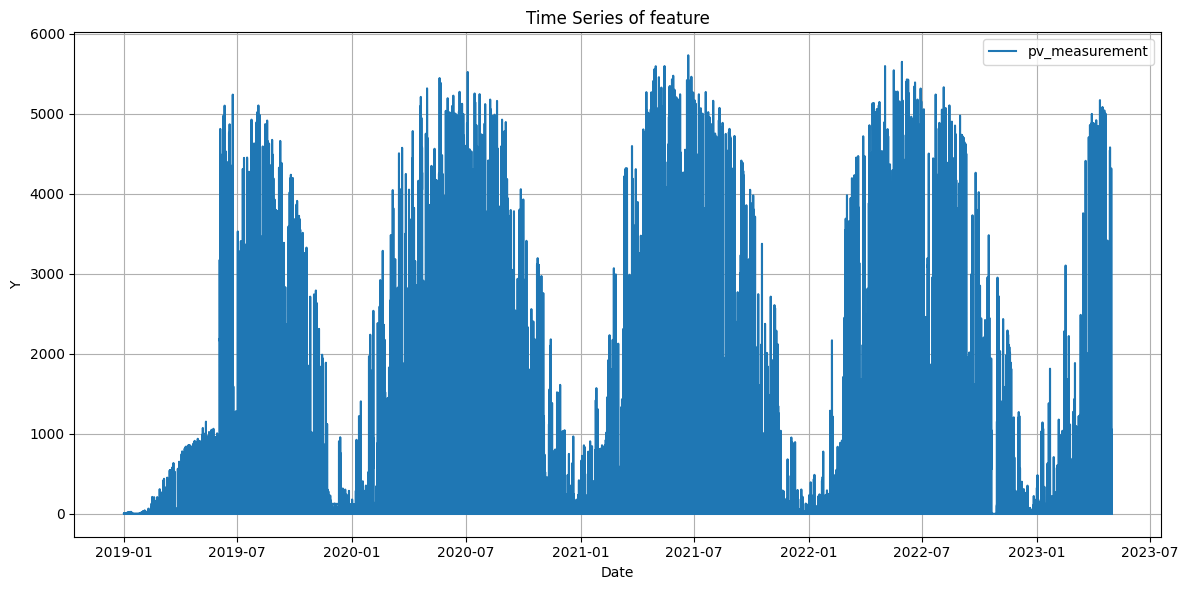

In [61]:
# Convert the 'date_forecast' column to a datetime format
training_and_validation['date_forecast'] = pd.to_datetime(training_and_validation['date_forecast'])

# Plot the time series
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(training_and_validation['date_forecast'], training_and_validation['pv_measurement'], label='pv_measurement')
plt.xlabel('Date')
plt.ylabel('Y')
plt.title('Time Series of feature')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show or save the plot
plt.show()

In [59]:
output_folder = 'new_features_datasets'
os.makedirs(output_folder, exist_ok=True)

test_file = os.path.join(output_folder, 'F_test.csv')
test.to_csv(test_file, index=False)

training_and_validation_file = os.path.join(output_folder, 'F_training_and_validation.csv')
training_and_validation.to_csv(training_and_validation_file, index=False)